# Iris classification

Classify flowers based on pedal and sepal widths and heights. The "Hello world" of ML. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Structure:<br>
1) Load data
2) EDA
3) Data preprocessing
4) Train and test models
    - Logistic regression
    - KNN
    - SVM
    - Decision tree
    - Random forest

## 1) Load data

Load data and import packages.

In [397]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn import preprocessing, neighbors, svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('IRIS.csv')

## 2) Explanatory data analysis (EDA)

2.1) Overview and descriptive statistics<br>
2.2) Feature assessment and visualisation<br>
2.3) Data quality evaluation<br>

### 2.1) Overview and descriptive statistics

In [398]:
print('\n\n______________________________________________\n\n')
print(f'Shape:\n\n{df.shape}')
print('\n\n______________________________________________\n\n')
print(f'Value counts:\n\n{df.species.value_counts()}')
print('\n\n______________________________________________\n\n')
print(f'Describe:\n\n{df.describe()}')
print('\n\n______________________________________________\n\n')
print(f'Missing data (nan values):\n\n{df.isnull().sum()}')
print('\n\n______________________________________________\n\n')
print(f'Info:\n\n{df.info()}')
print('\n\n______________________________________________\n\n')
print(f'Head:\n\n{df.head()}')
print('\n\n______________________________________________\n\n')



______________________________________________


Shape:

(150, 5)


______________________________________________


Value counts:

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


______________________________________________


Describe:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


______________________________________________


Missing data (nan values):

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species      

## 2.2) Feature assessment and visualisation

Univariate analyis (individual characteristics of the features).<br>
Multivariate analysis (relationship of features).

<Figure size 640x480 with 0 Axes>

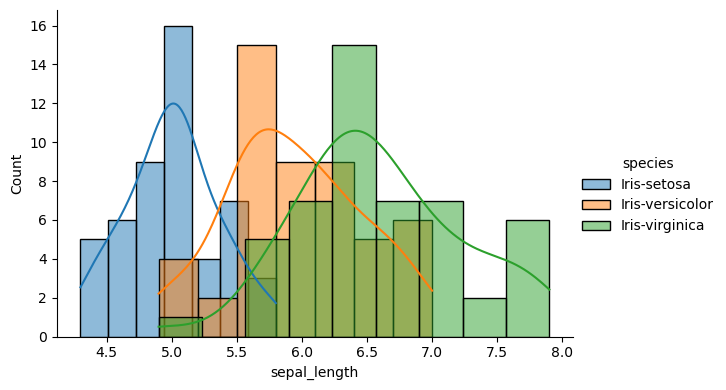

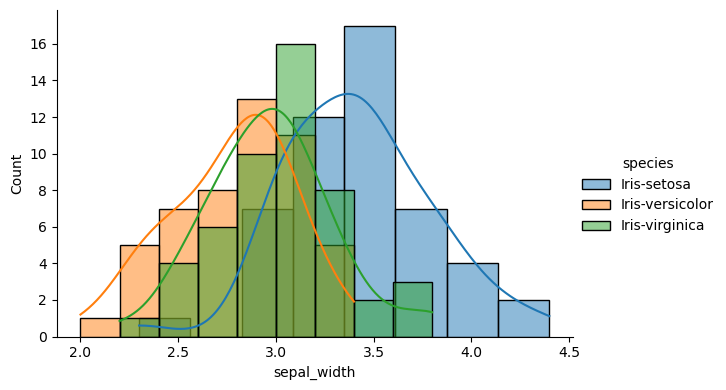

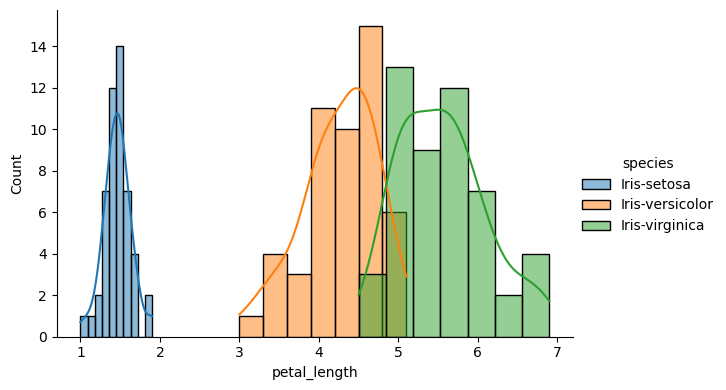

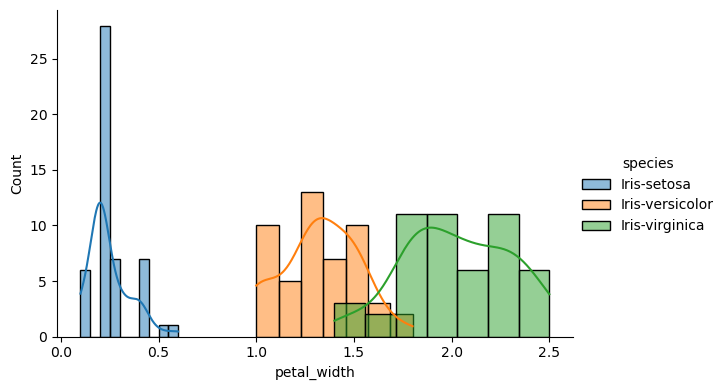

<Figure size 640x480 with 0 Axes>

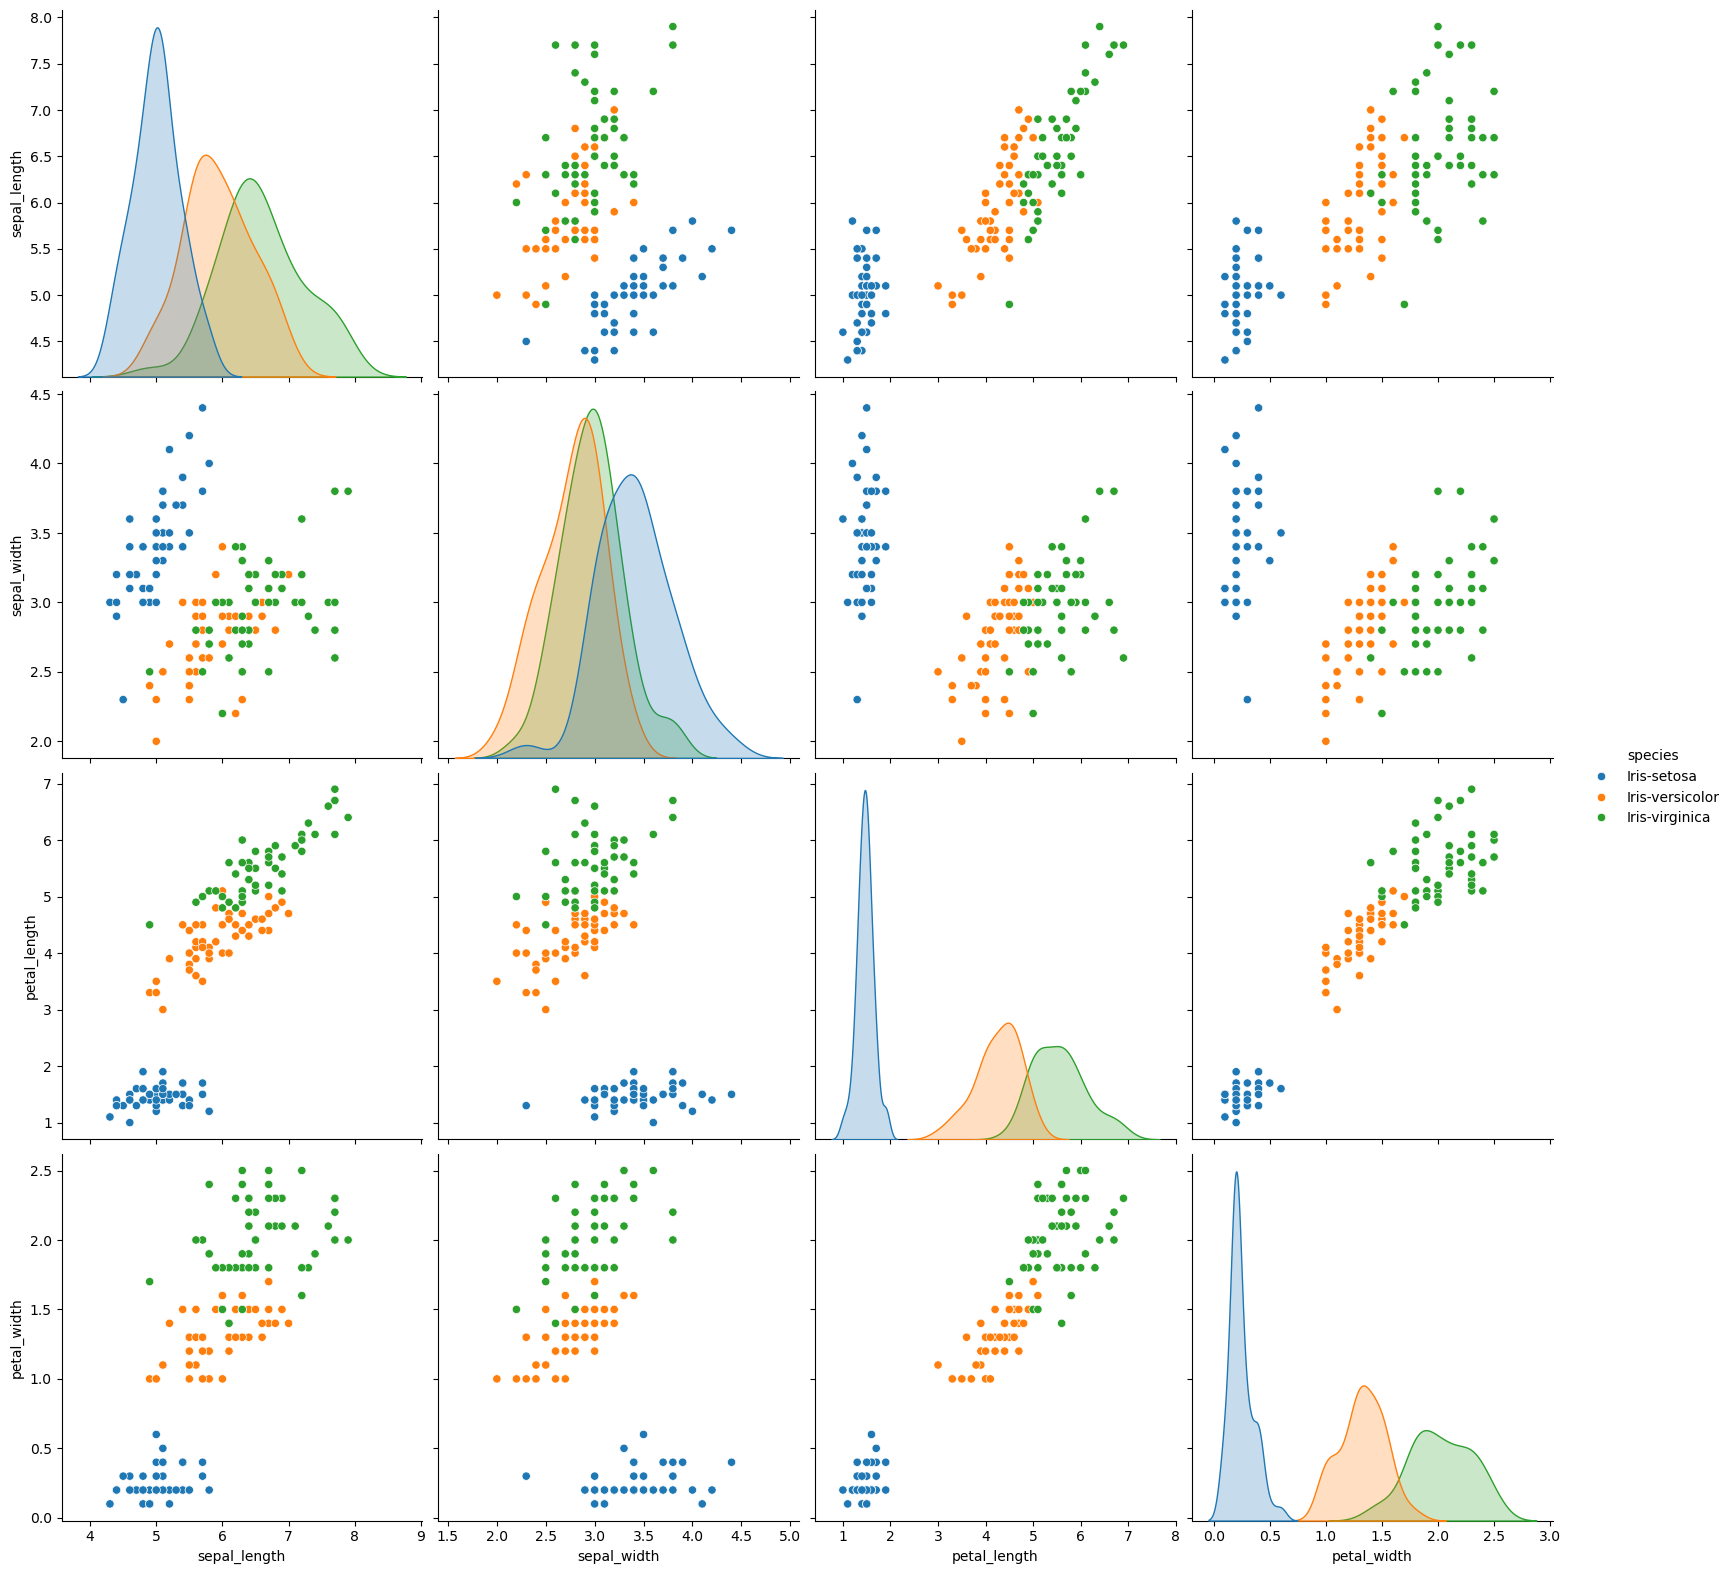

In [399]:
features = df.columns[:-1].values

plt.figure()
for f in features:
    g = sns.FacetGrid(df, hue='species', height=4, aspect=1.5)
    g.map(sns.histplot, f, kde=True)
    g.add_legend()

plt.figure()
sns.pairplot(df, hue='species', height=4, aspect=1)

<Axes: >

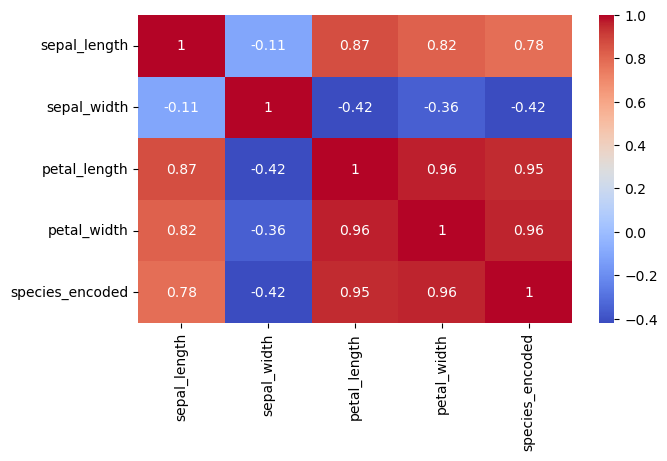

In [400]:
# Encode categorical target label as numerical for correlation matrix
label_encoder = preprocessing.LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

plt.figure(figsize=(7, 4))
sns.heatmap(df.loc[:, df.columns != 'species'].corr(), annot=True, cmap='coolwarm')

## 2.3) Data quality evaluation

Data quality profiling & EDA report. Saved as html file in the project folder. 

In [401]:
# ydata_profiling\model\pandas\discretize_pandas.py warning about int dtypes
warnings.filterwarnings('ignore', category=FutureWarning, module='ydata_profiling')

# Generate the report
profile = ProfileReport(df, title='Iris_classification_profile_report')

# Save the report to .html
profile.to_file('iris_classification_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 851.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3) Data preprocessing

Splitting data and standardizing features for logistic regression, KNN, and SVM. 


In [402]:
X = df.drop(columns=['species', 'species_encoded'])
y = df['species']

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Standardization for distance-dependent models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 4) Model training and testing

Test common machine learning models for the multiclass classification problem.
Used validation techniques: accuracy, precision, recall, F1, confusion matrix, AUC-ROC (one-versus-rest). 

4.1) Logistic regression<br>
4.2) KNN<br>
4.3) SVM<br>
4.4) Decision tree<br>
4.5) Random forest<br>



In [403]:
def compute_evaluation_metrics(y_test, y_pred):

    '''
    Parameters:
    y_test: one-dimensional array of targets
    y_pred: one-dimensional array of predictions

    Returns:
    accuracy, precision, recall, f1: floats
    '''

    # Compute the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(f'Accuracy: {accuracy:.3f}\n')
    print(f'Precision: {precision:.3f}\n')
    print(f'Recall: {recall:.3f}\n')
    print(f'F1 Score: {f1:.3f}\n')

    return accuracy, precision, recall, f1

def compute_and_visualize_confusion_matrix(y_test, y_pred):

    '''
    Parameters:
    y_test: one-dimensional array of targets
    y_pred: one-dimensional array of predictions

    Returns:
    cm: ndarray of shape (n_classes, n_classes)
    '''

    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

    return cm


### 4.1) Logistic regression

Accuracy: 0.967

Precision: 0.970

Recall: 0.967

F1 Score: 0.967

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]



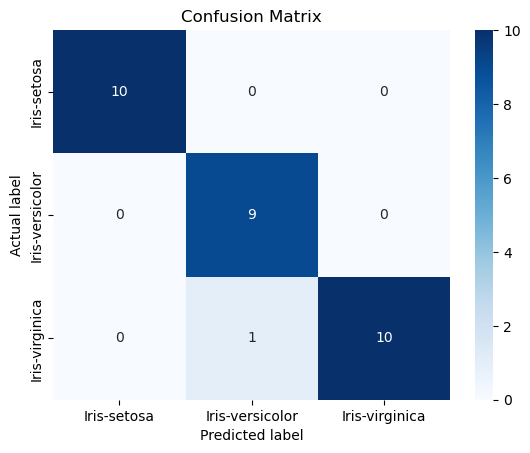

In [404]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy, precision, recall, f1 = compute_evaluation_metrics(y_test, y_pred)
cm = compute_and_visualize_confusion_matrix(y_test, y_pred)


### 4.2) K-nearest neighbors

Accuracy: 0.967

Precision: 0.970

Recall: 0.967

F1 Score: 0.967

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]



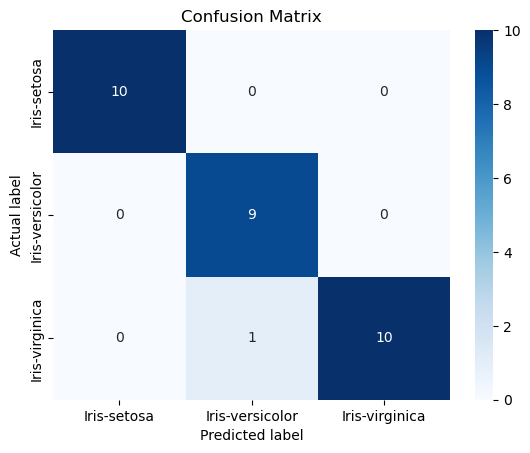

In [405]:
n_neighbors = 3

model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy, precision, recall, f1 = compute_evaluation_metrics(y_test, y_pred)
cm = compute_and_visualize_confusion_matrix(y_test, y_pred)


#### Pair plots of the decision boundaries for visualization exercise. 

Text(0.5, 0.98, 'Support vector classification, decision boundaries (linear kernel)')

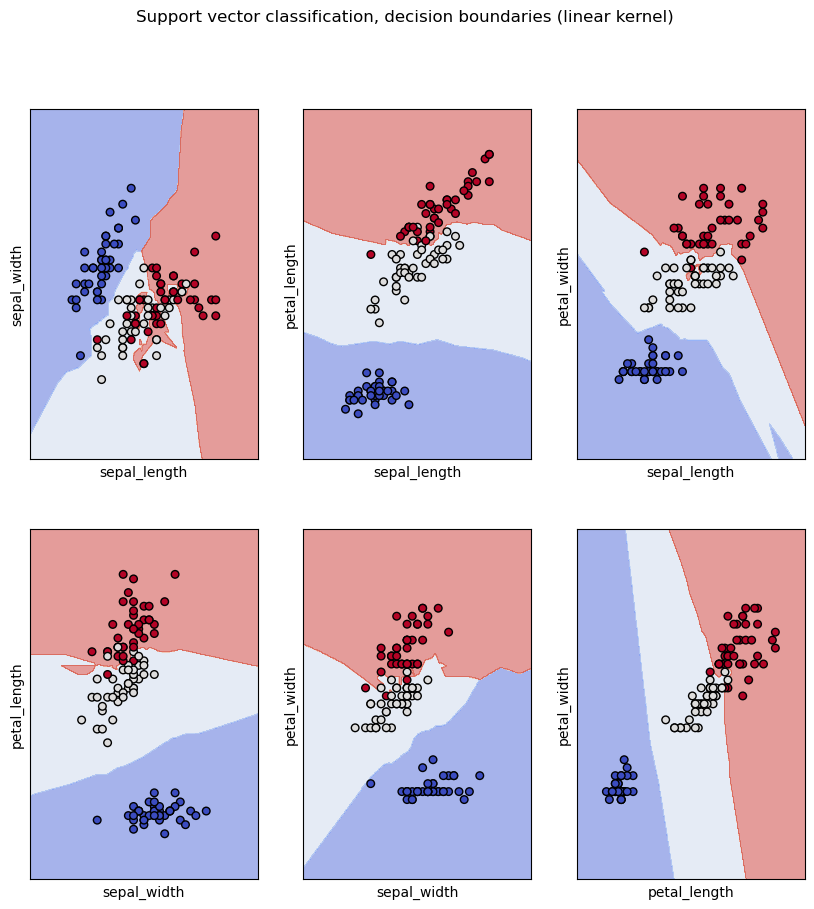

In [412]:
warnings.filterwarnings('ignore', message='.*X does not have valid feature names.*')

# Mesh step size
h = 0.01

fig, ax = plt.subplots(2, 3, figsize=(10, 10))
ax = ax.flatten()
cmap = plt.cm.coolwarm

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
features = df.drop(columns=['species', 'species_encoded']).columns

for i, pair in enumerate(feature_pairs):
    x_feat = X_train.iloc[:, pair[0]]
    y_feat = X_train.iloc[:, pair[1]]

    classifier = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    classifier.fit(X_train.iloc[:, pair], y_train_encoded)

    # Mesh for plotting
    x_min, x_max = x_feat.min() - 1, x_feat.max() + 1
    y_min, y_max = y_feat.min() - 1, y_feat.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    ax[i].contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    ax[i].scatter(x_feat, y_feat, c=y_train_encoded, cmap=cmap, edgecolors='k', s=30)
    ax[i].set_xlabel(features[pair[0]])
    ax[i].set_ylabel(features[pair[1]])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.suptitle('Support vector classification, decision boundaries (linear kernel)')

### 4.3) Support vector machine

Radial basis function kernel and regularization parameter C=1 (balanced regularization)

Accuracy: 0.967

Precision: 0.970

Recall: 0.967

F1 Score: 0.967

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]



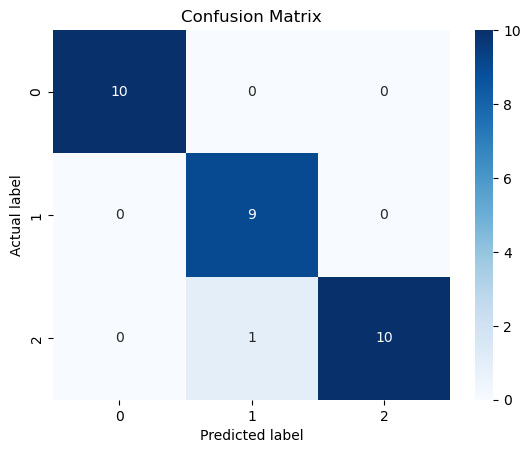

In [407]:
svc = svm.SVC(C=1.0, kernel='rbf').fit(X_train_scaled, y_train_encoded)
y_pred = svc.predict(X_test_scaled)

accuracy, precision, recall, f1 = compute_evaluation_metrics(y_test_encoded, y_pred)
cm = compute_and_visualize_confusion_matrix(y_test_encoded, y_pred)


#### Pair plots of the linear decision boundaries for visualization exercise. 

Text(0.5, 0.98, 'Support vector classification, decision boundaries (linear kernel)')

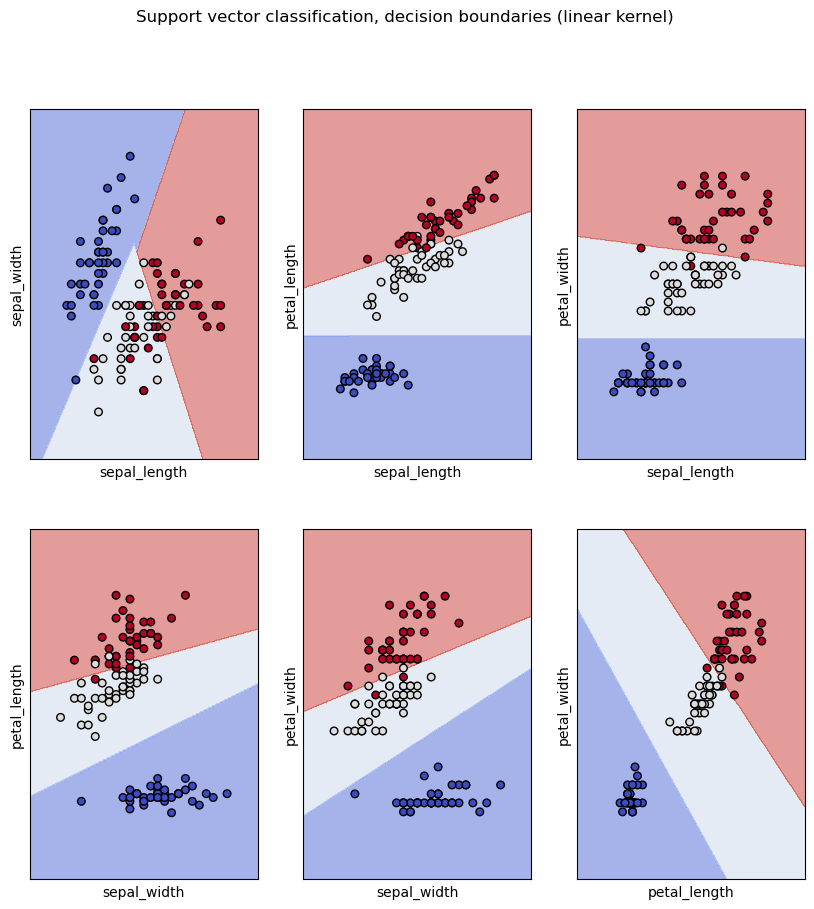

In [408]:
# Regularization parameter balancing between wide decision boundary margins and low nbr of misclassifications
C = 1.0
# Mesh step size
h = 0.01

fig, ax = plt.subplots(2, 3, figsize=(10, 10))
ax = ax.flatten()
cmap = plt.cm.coolwarm

feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
features = df.drop(columns=['species', 'species_encoded']).columns

for i, pair in enumerate(feature_pairs):
    x_feat = X_train_scaled[:, pair[0]]
    y_feat = X_train_scaled[:, pair[1]]

    svc = svm.SVC(kernel='linear', C=C).fit(X_train_scaled[:, pair], y_train_encoded)

    # Mesh for plotting
    x_min, x_max = x_feat.min() - 1, x_feat.max() + 1
    y_min, y_max = y_feat.min() - 1, y_feat.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    ax[i].contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    ax[i].scatter(x_feat, y_feat, c=y_train_encoded, cmap=cmap, edgecolors='k', s=30)
    ax[i].set_xlabel(features[pair[0]])
    ax[i].set_ylabel(features[pair[1]])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.suptitle('Support vector classification, decision boundaries (linear kernel)')

### 4.4) Decision tree

Accuracy: 1.000

Precision: 1.000

Recall: 1.000

F1 Score: 1.000

Feature importance / Gini impurity (how much a feature contributes to the reduction in entrophyy)
sepal_length importance: 0.000
sepal_width importance: 0.014
petal_length importance: 0.316
petal_width importance: 0.670


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



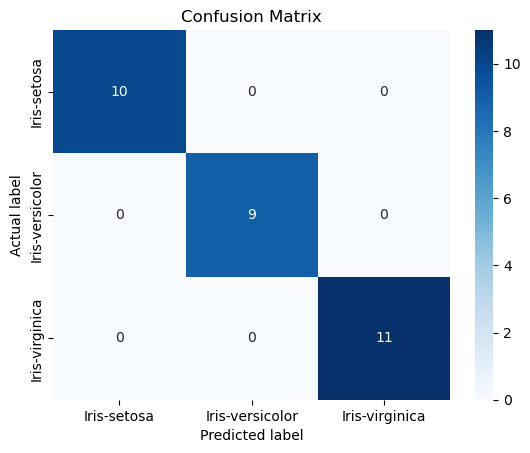

In [409]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy, precision, recall, f1 = compute_evaluation_metrics(y_test, y_pred)

print('Feature importance / Gini impurity (how much a feature contributes to the reduction in entrophyy)')
for (importance, l) in zip(classifier.feature_importances_, classifier.feature_names_in_):
    print(f'{l} importance: {importance:.3f}')
print('\n')

cm = compute_and_visualize_confusion_matrix(y_test, y_pred)


#### Pair plots of the decision boundaries for visualization exercise. 

Text(0.5, 0.98, 'Decision tree, decision boundaries (criterion: entrophy)')

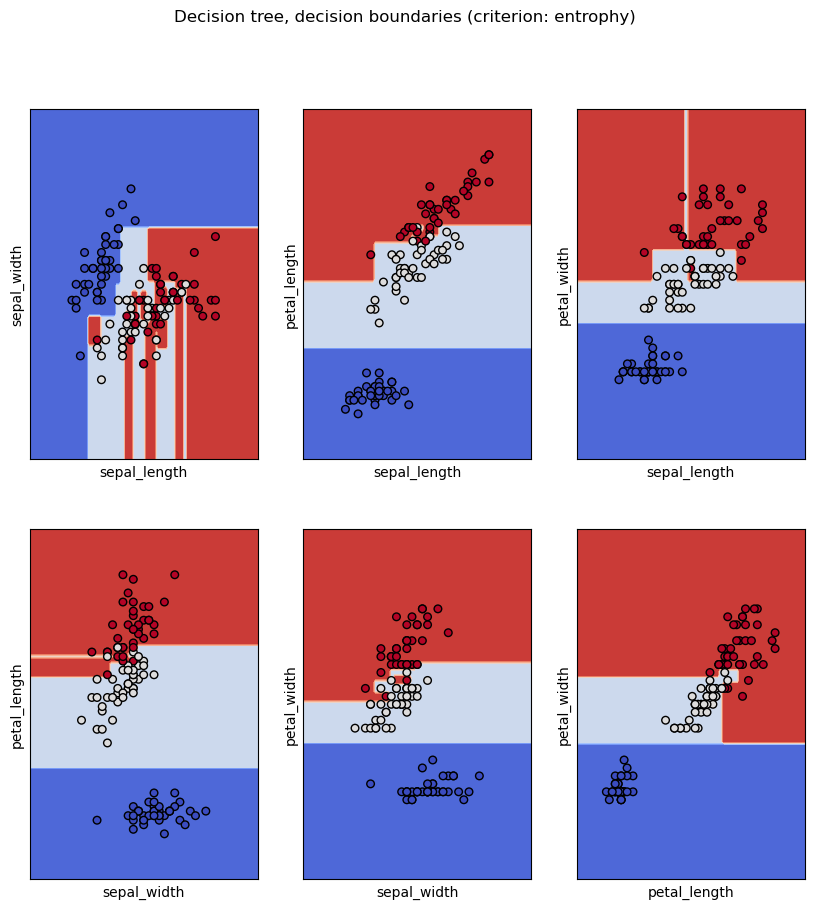

In [410]:
# Mesh step size
h = 0.01

fig, ax = plt.subplots(2, 3, figsize=(10, 10))
ax = ax.flatten()
cmap = plt.cm.coolwarm

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
features = df.drop(columns=['species', 'species_encoded']).columns

for i, pair in enumerate(feature_pairs):
    x_feat = X_train.iloc[:, pair[0]]
    y_feat = X_train.iloc[:, pair[1]]

    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_train.iloc[:, pair], y_train)

    # Mesh for plotting
    x_min, x_max = x_feat.min() - 1, x_feat.max() + 1
    y_min, y_max = y_feat.min() - 1, y_feat.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_train.iloc[:, pair],
        cmap=cmap,
        response_method='predict',
        ax=ax[i],
        xlabel=features[pair[0]],
        ylabel=features[pair[1]],
    )

    ax[i].scatter(x_feat, y_feat, c=y_train_encoded, cmap=cmap, edgecolors='k', s=30)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.suptitle('Decision tree, decision boundaries (criterion: entrophy)')

### 4.5) Random forest 

Accuracy: 1.000

Precision: 1.000

Recall: 1.000

F1 Score: 1.000

Feature importance / Gini impurity (how much a feature contributes to the reduction in entrophyy)
sepal_length importance: 0.097
sepal_width importance: 0.027
petal_length importance: 0.428
petal_width importance: 0.448


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



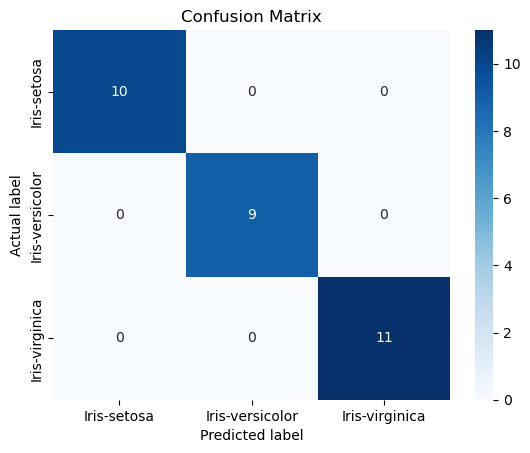

In [411]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

accuracy, precision, recall, f1 = compute_evaluation_metrics(y_test, y_pred)

print('Feature importance / Gini impurity (how much a feature contributes to the reduction in entrophyy)')
for (importance, l) in zip(forest.feature_importances_, forest.feature_names_in_):
    print(f'{l} importance: {importance:.3f}')
print('\n')

cm = compute_and_visualize_confusion_matrix(y_test, y_pred)